### Data Augmentation for WAV Files - VoxSRC 2020

In [1]:
from data_augmentation_audio.py import *

NameError: name 'sr' is not defined

<Figure size 720x288 with 0 Axes>

In [87]:
# Reading the WAV file and loading it in as a floating point time series
def readWAVFile(filename):
    signal, sample_rate = librosa.load(filename)
    return signal, sample_rate

In [104]:
def addWhiteNoise(signal, sample_rate, req_snr):
    # https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8
    RMS_signal = np.sqrt(np.mean(signal**2))
    RMS_noisy_sig = np.sqrt(RMS_signal**2/(10 ** (req_snr/10)))
    noise = np.random.normal(0, RMS_noisy_sig, signal.shape[0])
    whiteNoisySignal = signal + noise
    return whiteNoisySignal

In [15]:
def addBabble(signal, sample_rate):
    return babbleWavFile

In [16]:
def addTimeDelay(signal, sample_rate):
    return timeDelayFileArray

In [17]:
def increasePitch(signal, sample_rate):
    return increasePitchWavFile

In [18]:
def decreasePitch(signal, sample_rate):
    return decreasePitchWavFile

In [133]:
def changeSpeed(signal, sample_rate, speed_factor):
    changeSpeedSignal = librosa.core.resample(signal, sample_rate, 1/speed_factor * sample_rate)
    return changeSpeedSignal

In [81]:
def convertToMFCC(signal, sample_rate):
    
    # Converting signal to MFCC features
    mfcc_features = librosa.feature.mfcc(y=signal, sr=sample_rate)
    
    # Displaying the MFCC - sanity check
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc_features, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()
    
    return mfcc_features

In [78]:
def saveMFCC(MFCC):
    return True

In [117]:
def saveWAV(signal, sample_rate, filepath):
    sf.write(filepath, signal, sample_rate, format='wav')

### Testing the Code

#### Reading the WAV Audio File

In [94]:
signal, sample_rate = readWAVFile('sample_sounds/sample_starwars.wav')
ipd.Audio('sample_sounds/sample_starwars.wav')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


#### Finding MFCC of Signal

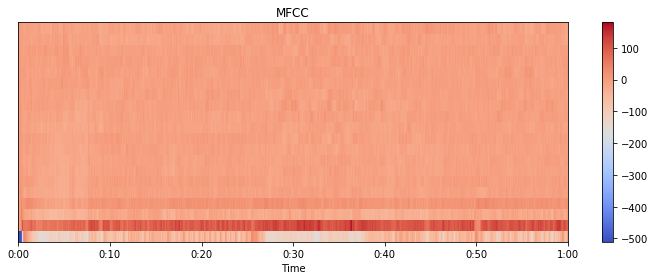

In [90]:
mfcc_features = convertToMFCC(signal, sample_rate)

#### Adding White Noise and Finding MFCC of Noisy Signal

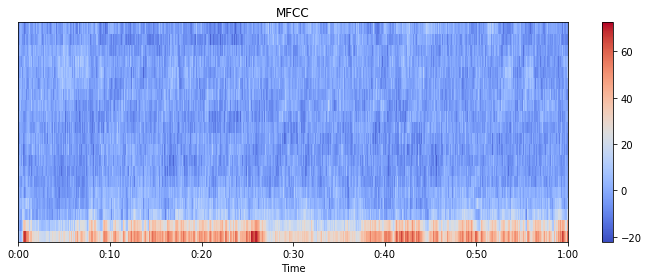

In [118]:
whiteNoisySignal = addWhiteNoise(signal, sample_rate, 0.5)
mfcc_features = convertToMFCC(whiteNoisySignal, sample_rate)
saveWAV(whiteNoisySignal, sample_rate, 'output_sounds/whitenoise.wav')

#### Increasing Speed and Finding MFCC of Increased Speed Signal

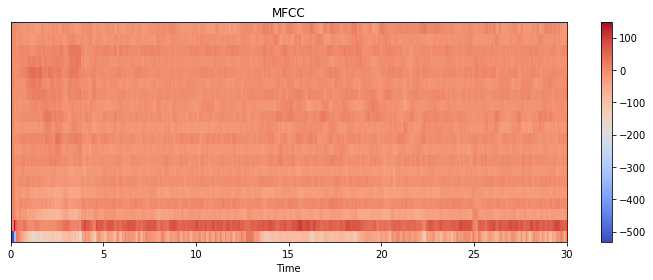

In [128]:
increaseSpeedSignal = changeSpeed(signal, sample_rate, 2.0)
mfcc_features = convertToMFCC(increaseSpeedSignal, sample_rate)
saveWAV(increaseSpeedSignal, sample_rate, 'output_sounds/fastSpeed.wav')

#### Decreasing Speed and Finding MFCC of Decreased Speed Signal

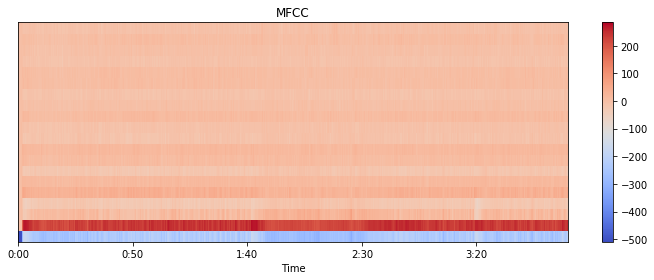

In [132]:
increaseSpeedSignal = changeSpeed(signal, sample_rate, 0.25)
mfcc_features = convertToMFCC(increaseSpeedSignal, sample_rate)
saveWAV(increaseSpeedSignal, sample_rate, 'output_sounds/slowSpeed.wav')